In [1]:
import pandas as pd
import numpy as np


# Task 1.1: Data loading

Description:Load the dataset and display the number of patients and the number of features.


In [2]:
data = pd.read_csv('resources/tcga.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Columns: 4002 entries, gene_0 to outcome
dtypes: float64(4001), int64(1)
memory usage: 294.9 MB


#### Answer 1.1: Datset has 9659 number of patients and 4002 features

# Task 1.2: Filtering


Description: Write a function that computes the highest value among all patients for a feature A.

Evaluation: Execute this function for the feature = "gene_0".

Input : Which feature A to evaluate.

Expected Output: The highest value for the input feature A .

Observation: The result must not be NAN/null.

In [4]:
def get_highest_value(data, column_name):
    return data[column_name].max()

In [5]:
data.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_3992', 'gene_3993', 'gene_3994', 'gene_3995', 'gene_3996',
       'gene_3997', 'gene_3998', 'gene_3999', 'treatment', 'outcome'],
      dtype='object', length=4002)

In [6]:
get_highest_value(data, 'gene_0')

0.0290394998953435

# Task 1.3: Filtering

Description : Adapt the previous function to return the patient(s) with the maximum feature value too.

Evaluation: Execute this function for feature = "gene_0".
    
Input: The feature A to evaluate.
    
Expected Output: The highest value for feature A and the patient(s) with the highest value for feature A .
    
Observation: The result must not be NAN/null.


In [7]:
def get_highest_value_patients(data, column_name):
    return data[data[column_name] == get_highest_value(data, column_name)]

In [8]:
get_highest_value_patients(data, 'gene_1')

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_3992,gene_3993,gene_3994,gene_3995,gene_3996,gene_3997,gene_3998,gene_3999,treatment,outcome
24,0.0,0.033916,0.016329,0.024052,0.013954,0.004832,NaN,0.0,0.016657,0.007425,...,0.01874,0.022497,NaN,0.01711,0.012873,0.018706,0.010782,0.024338,2,29.110066


# Task 1.4: Aggregations

Description : Calculate the percentage of missing values(NANs) in the covariates dataset.

In [9]:
def get_percentage_of_missing_values(data):         # missing values are NaN
    return data.isnull().sum() / len(data)

In [10]:
get_percentage_of_missing_values(data)

gene_0       0.102599
gene_1       0.102909
gene_2       0.096801
gene_3       0.102909
gene_4       0.097319
               ...   
gene_3997    0.106222
gene_3998    0.100010
gene_3999    0.100735
treatment    0.000000
outcome      0.000000
Length: 4002, dtype: float64

# Task 1.5: Aggregations 2

Description: Create a function that that computes the mutual information between the values of a feature A
and the outcome , for each potential treatment value.

Evaluation: Evaluate the function for the "gene_1" feature.
    
Example: If the treatment column contains the values [0, 1], and you want to evaluate feature
gene_33 , the output will be

{
 0: MI(outcome[T == 0], X[T == 0][`gene_33`]),
 1: MI(outcome[T == 1], X[T == 1][`gene_33`])
}

Input: The feature A to correlate.
Expected output: A dictionary of form { treatment value : <mutual
information between A and outcome > }


In [11]:
from sklearn.feature_selection import mutual_info_regression

In [12]:
def get_mutual_information_for_feature(data, feature):
    x = data[[feature, 'treatment', 'outcome']]
    t = data['treatment'].unique()
    #print(x)
    #print('--------------------------')
    #print(y)
    resut_dict = {}
    for i in t:
        df = x[x['treatment'] == i].drop(columns=['treatment'], axis=1)
        #print(df.head())
        feature_rearraged = np.array(df[feature].fillna(0)).reshape(-1,1)
        resut_dict[i] = mutual_info_regression(feature_rearraged, df['outcome'])[0]
    return resut_dict
        

In [13]:
print(get_mutual_information_for_feature(data, 'gene_0'))

{2: 0, 1: 0, 0: 5.5015344227138385e-05}


# Task 1.6: Outliers

Description: Write a function that computes the outliers for a feature A . Bonus : Plot the outliers.

Evaluation: Evaluate the function for gene_1 .

Input: A : the feature to evaluate Expected output: A list of outliers for feature A .

Observation : You can use any anomaly score for this task.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def box_plot(data, feature):
    plt.figure(figsize=(16, 5))
    plt.subplot(1,2,1)
    sns.distplot(data[feature])
    plt.subplot(1, 2, 2)
    sns.boxplot(data[feature])
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


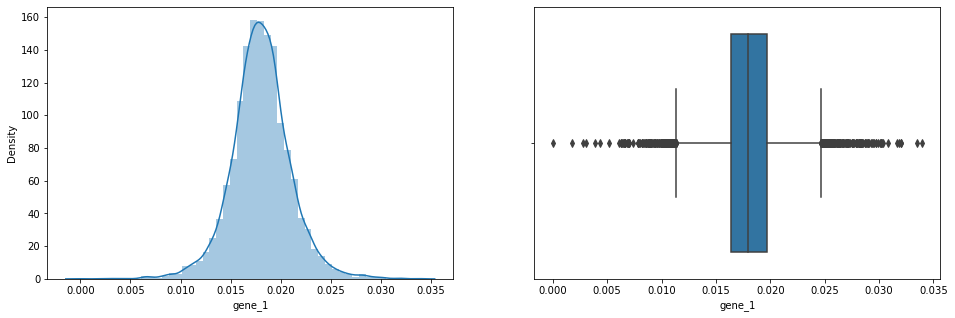

In [16]:
box_plot(data, 'gene_1')

In [17]:
def find_outliers(data, feature):
    percentile25 = data[feature].quantile(0.25)
    percentile75 = data[feature].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    outliers = data[(data[feature] > upper_limit)|(data[feature] < lower_limit)]
    return list(outliers[feature])

In [18]:
find_outliers(data, 'gene_1')

[0.0278935122061578,
 0.0283316228714022,
 0.0318261698458013,
 0.0308367955309619,
 0.0297470190004244,
 0.029388720760313,
 0.0289486830029175,
 0.024938025747525,
 0.026136202509157,
 0.025814609563606,
 0.0282464718928724,
 0.0284275818469578,
 0.0263645611630386,
 0.0250912693058075,
 0.0290106892986255,
 0.0339159630409869,
 0.028763470476452,
 0.0282033870984217,
 0.0281211616757475,
 0.0277097716184147,
 0.030223574359269,
 0.0249129036964237,
 0.0286715744098604,
 0.0270249562502229,
 0.0269710229079014,
 0.0251233670250424,
 0.0253831873272556,
 0.0256444056164864,
 0.0278471369052423,
 0.0270361929708929,
 0.0284763589434014,
 0.0255397073427657,
 0.029075736130549,
 0.0257068961510033,
 0.0264510884725247,
 0.0255080771124315,
 0.0270858721696975,
 0.0250477497120584,
 0.0300512467471461,
 0.0320382725926229,
 0.0282856866540366,
 0.026434037891379,
 0.0282938562024193,
 0.0275073578245559,
 0.0299362084903124,
 0.0252613947198745,
 0.0252575052452318,
 0.0113145641655503,


In [19]:
def fill_missing_values_by_mean(data, column_name):
    data[column_name].fillna(data[column_name].mean(), inplace=True)
    return data

In [22]:
from sklearn.decomposition import PCA


In [23]:
df = data.drop(columns=['outcome','treatment'], axis=1)

In [24]:
for i in df.columns:
    df = fill_missing_values_by_mean(df, i)

In [26]:
pca = PCA(n_components=100)
pca_result = pca.fit_transform(df)

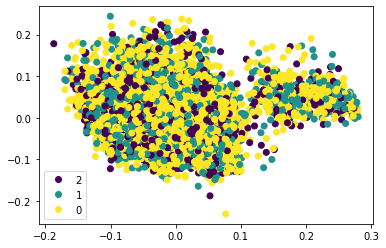

In [27]:
plot = plt.scatter(pca_result[:,0], pca_result[:,1], c=data['treatment'])
plt.legend(handles=plot.legend_elements()[0], labels=list(data['treatment'].unique()))
plt.show()

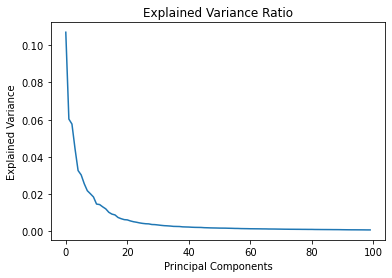

array([0.10697795, 0.0603383 , 0.05765785, 0.04443721, 0.03267956,
       0.03034932, 0.02561   , 0.02185902, 0.02022901, 0.01850595,
       0.01468942, 0.01442409, 0.01319964, 0.01210686, 0.01026146,
       0.0092952 , 0.00885307, 0.00746997, 0.00683058, 0.00632704,
       0.00619382, 0.00563449, 0.00520822, 0.00492306, 0.00457058,
       0.0043004 , 0.0041181 , 0.0040419 , 0.00370701, 0.00364348,
       0.00345515, 0.00325271, 0.00308817, 0.00299668, 0.00287744,
       0.00270448, 0.00266386, 0.00262198, 0.00244864, 0.0023885 ,
       0.00234066, 0.00223959, 0.00217632, 0.00214785, 0.00212099,
       0.00200358, 0.00195589, 0.00189364, 0.00185441, 0.00182585,
       0.00177556, 0.00176354, 0.00174628, 0.0016955 , 0.00166021,
       0.00160006, 0.00158256, 0.00151495, 0.00149099, 0.00146652,
       0.00142759, 0.00141262, 0.00139509, 0.00137948, 0.00134831,
       0.00133876, 0.00129342, 0.00128212, 0.00127005, 0.00123895,
       0.00121812, 0.00118359, 0.00117021, 0.00114932, 0.00114

In [28]:
# Plot
plt.plot(range(0,100), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()
pca.explained_variance_ratio_

# Task 1.7: Visualizations (Bonus)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df)

In [31]:
data_rescaled.shape

(9659, 4000)

In [32]:
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [33]:
reduced.shape

(9659, 1679)

In [34]:
pca = PCA().fit(data_rescaled)

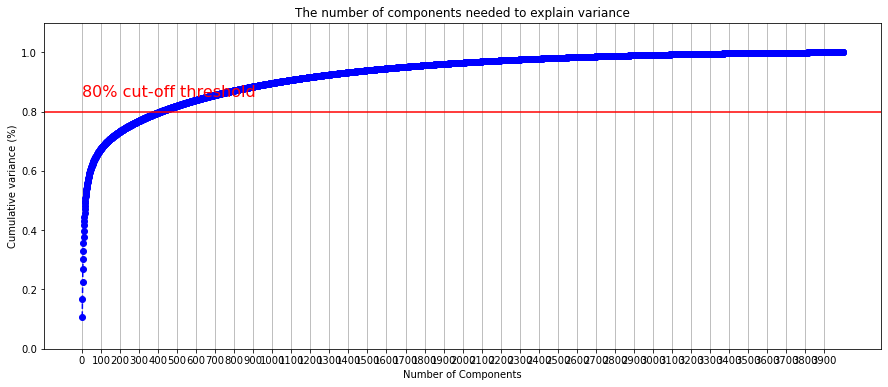

In [35]:
#pca = PCA().fit(data_rescaled)

#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

fig, ax = plt.subplots()
xi = np.arange(1,4001, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 4000, step=100)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00023
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00045
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00026
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00041
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00031
Feature: 27, Score: 0.00001
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

Feature: 3214, Score: 0.00002
Feature: 3215, Score: 0.00000
Feature: 3216, Score: 0.00000
Feature: 3217, Score: 0.00000
Feature: 3218, Score: 0.00003
Feature: 3219, Score: 0.00000
Feature: 3220, Score: 0.00003
Feature: 3221, Score: 0.00001
Feature: 3222, Score: 0.00001
Feature: 3223, Score: 0.00002
Feature: 3224, Score: 0.00000
Feature: 3225, Score: 0.00020
Feature: 3226, Score: 0.00000
Feature: 3227, Score: 0.00000
Feature: 3228, Score: 0.00003
Feature: 3229, Score: 0.00000
Feature: 3230, Score: 0.00001
Feature: 3231, Score: 0.00048
Feature: 3232, Score: 0.00000
Feature: 3233, Score: 0.00002
Feature: 3234, Score: 0.00000
Feature: 3235, Score: 0.00060
Feature: 3236, Score: 0.00026
Feature: 3237, Score: 0.00012
Feature: 3238, Score: 0.00000
Feature: 3239, Score: 0.00000
Feature: 3240, Score: 0.00071
Feature: 3241, Score: 0.00000
Feature: 3242, Score: 0.00000
Feature: 3243, Score: 0.00000
Feature: 3244, Score: 0.00000
Feature: 3245, Score: 0.00000
Feature: 3246, Score: 0.00000
Feature: 3

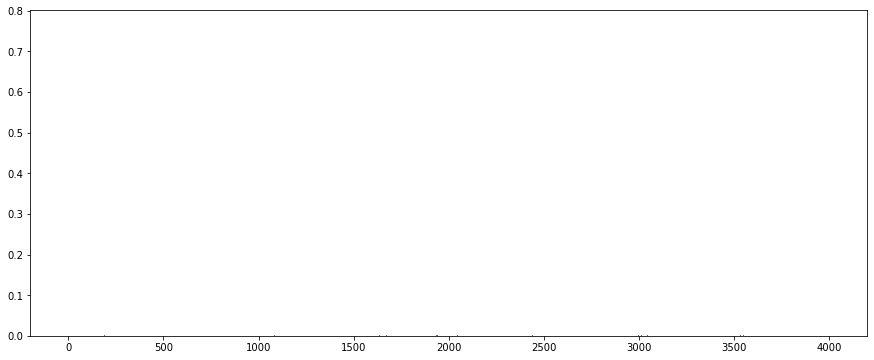

In [37]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = pd.concat((df,data['treatment']), axis=1), data['outcome']
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [38]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00023
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00045
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00026
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00041
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00031
Feature: 27, Score: 0.00001
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

Feature: 3204, Score: 0.00000
Feature: 3205, Score: 0.00025
Feature: 3206, Score: 0.00000
Feature: 3207, Score: 0.00001
Feature: 3208, Score: 0.00000
Feature: 3209, Score: 0.00000
Feature: 3210, Score: 0.00000
Feature: 3211, Score: 0.00002
Feature: 3212, Score: 0.00005
Feature: 3213, Score: 0.00080
Feature: 3214, Score: 0.00002
Feature: 3215, Score: 0.00000
Feature: 3216, Score: 0.00000
Feature: 3217, Score: 0.00000
Feature: 3218, Score: 0.00003
Feature: 3219, Score: 0.00000
Feature: 3220, Score: 0.00003
Feature: 3221, Score: 0.00001
Feature: 3222, Score: 0.00001
Feature: 3223, Score: 0.00002
Feature: 3224, Score: 0.00000
Feature: 3225, Score: 0.00020
Feature: 3226, Score: 0.00000
Feature: 3227, Score: 0.00000
Feature: 3228, Score: 0.00003
Feature: 3229, Score: 0.00000
Feature: 3230, Score: 0.00001
Feature: 3231, Score: 0.00048
Feature: 3232, Score: 0.00000
Feature: 3233, Score: 0.00002
Feature: 3234, Score: 0.00000
Feature: 3235, Score: 0.00060
Feature: 3236, Score: 0.00026
Feature: 3

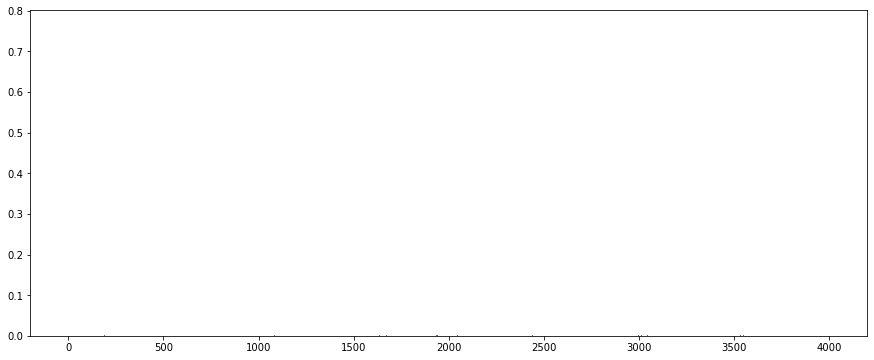

In [39]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [40]:
importance

array([0.00000000e+00, 6.56489987e-08, 1.82741191e-04, ...,
       1.21652755e-04, 0.00000000e+00, 7.64743179e-01])

# 2. Machine learning

# Task 2.1: Data pre-processing


From task 1.4 we can see there are missing values in the data. So using the filled data from task 1.7.
Finding outliers and removing them by using function  developed on task 1.6

In [45]:
df_out = pd.concat([df,data[['outcome','treatment']]],axis=1)
df_out


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_3992,gene_3993,gene_3994,gene_3995,gene_3996,gene_3997,gene_3998,gene_3999,outcome,treatment
0,0.00000,0.022179,0.019991,0.028667,0.017235,0.001487,0.014651,0.007045,0.020046,0.004194,...,0.001817,0.023123,0.019850,0.023891,0.020087,0.016228,0.015739,0.021505,25.674837,2
1,0.00000,0.027894,0.014104,0.020912,0.017235,0.011135,0.017990,0.015889,0.021798,0.013605,...,0.010615,0.022372,0.017864,0.021327,0.019718,0.016196,0.016092,0.015684,27.501519,2
2,0.00035,0.028332,0.016133,0.020912,0.009922,0.013941,0.013031,0.015186,0.021257,0.005755,...,0.012578,0.023699,0.018701,0.018225,0.017982,0.016961,0.018936,0.019644,15.950662,1
3,0.00000,0.015878,0.015199,0.017267,0.017235,0.009016,0.022765,0.020222,0.019775,0.016970,...,0.017885,0.022265,0.018220,0.020041,0.022580,0.015747,0.019841,0.010349,15.708792,2
4,0.00000,0.031826,0.018024,0.027217,0.017235,0.009153,0.009873,0.015186,0.019805,0.010973,...,0.008122,0.025017,0.018701,0.015463,0.012341,0.020715,0.015846,0.015224,14.753644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,0.00000,0.020901,0.028976,0.025709,0.016930,0.019892,0.016463,0.018363,0.019775,0.014498,...,0.014734,0.017663,0.019260,0.018045,0.015242,0.018939,0.013573,0.010081,28.989055,2
9655,0.00000,0.018027,0.023331,0.027880,0.024217,0.022763,0.021393,0.015186,0.003844,0.016883,...,0.016724,0.013431,0.018701,0.017050,0.015452,0.012833,0.012812,0.008242,12.186272,1
9656,0.00000,0.019438,0.016772,0.022881,0.020841,0.022703,0.017101,0.012588,0.006142,0.013010,...,0.022589,0.021116,0.022175,0.023983,0.020779,0.020525,0.017210,0.008437,15.467205,1
9657,0.00035,0.023508,0.025859,0.026758,0.019333,0.025099,0.017990,0.023777,0.005030,0.018767,...,0.011127,0.013934,0.025146,0.019494,0.017842,0.021234,0.020522,0.009067,27.048886,2


In [53]:
data_rescaled = scaler.fit_transform(df_out.drop(columns=['outcome'], axis =1))

In [58]:
from sklearn.model_selection import train_test_split

In [60]:

X_train, X_test, y_train, y_test = train_test_split(data_rescaled, df_out['outcome'], test_size=0.33, random_state=42)

In [71]:

pca = PCA(n_components = 0.80)
pca.fit(X_train)
reduced = pca.transform(X_train)

In [72]:
reduced.shape

(6471, 384)

# Task 2.2: Model fitting


In [73]:
from sklearn import linear_model

In [74]:
model = linear_model.LinearRegression()

In [75]:
model.fit(reduced, y_train)

LinearRegression()

In [76]:
reduced_x_test = pca.transform(X_test)

In [77]:
reduced_x_test.shape

(3188, 384)

In [79]:
predicted = model.predict(reduced_x_test)

# Task 2.3: Model evaluation

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, predicted)
rmse = sqrt(mse)

In [83]:
rmse

3.9071512672554296

# Task 2.4: Model errors

In [100]:
X_test.dtype

dtype('float64')

In [101]:
X_test

array([[0.09367307, 0.62782713, 0.59956973, ..., 0.44291055, 0.37059374,
        0.        ],
       [0.01206638, 0.48447386, 0.50095711, ..., 0.4287052 , 0.27908774,
        1.        ],
       [0.01206638, 0.50750996, 0.60356919, ..., 0.37493352, 0.45813677,
        0.5       ],
       ...,
       [0.        , 0.46654001, 0.52114802, ..., 0.5066575 , 0.39653707,
        1.        ],
       [0.01206638, 0.52610458, 0.5257119 , ..., 0.39239885, 0.37357788,
        1.        ],
       [0.        , 0.53974311, 0.47523561, ..., 0.39854252, 0.35658526,
        1.        ]])

In [105]:
X_test = pd.DataFrame(scaler.inverse_transform(X_test))

In [120]:
X_test.shape

(3188, 4001)

In [125]:
y_test

3495    13.504543
8740    29.354355
3100    17.178275
3862    25.696222
3686    16.987087
          ...    
463     17.205612
1754    25.638434
4004    28.359295
4250    25.911192
9136    29.278620
Name: outcome, Length: 3188, dtype: float64

In [126]:
predicted

array([10.33917809, 24.73215658, 17.77138327, ..., 26.11402095,
       26.67900717, 25.11300894])

In [128]:
patients = []
for i in range(X_test.shape[0]):
    #print(i)
    #print(list(y_test)[i])
    if ((list(y_test)[i] - predicted[i])*(list(y_test)[i] - predicted[i]))>100:
        patients.append(i)

In [132]:
patient_list = []
for i in patients:
    patient_list.append(X_test[i])

### List of patients where model perform wrong

In [134]:
pd.DataFrame(patient_list)

,0,1,2,3,4,5,6,7,8,9,...,3178,3179,3180,3181,3182,3183,3184,3185,3186,3187
67,0.017604,0.022508,0.014117,0.014001,0.013742,0.019915,0.016708,0.022811,0.011160,0.017679,...,0.012919,0.015162,0.014787,0.022021,0.019839,0.014601,0.019483,0.016875,0.020908,0.017379
86,0.013855,0.014380,0.012321,0.012659,0.012672,0.013270,0.011612,0.011226,0.011248,0.014116,...,0.012672,0.013463,0.012672,0.016325,0.013543,0.017436,0.016265,0.011629,0.010732,0.016211
105,0.014260,0.013730,0.016067,0.024636,0.017697,0.023960,0.018482,0.027419,0.015043,0.013361,...,0.017697,0.021878,0.022968,0.013134,0.024888,0.013980,0.012070,0.021829,0.022371,0.022715
120,0.007342,0.016564,0.012672,0.013328,0.001168,0.017299,0.019142,0.004064,0.016809,0.028121,...,0.022879,0.023158,0.013681,0.016836,0.013681,0.028525,0.025334,0.013681,0.012611,0.016197
182,0.014926,0.012272,0.010711,0.013550,0.017613,0.015039,0.011199,0.014726,0.021425,0.010286,...,0.018085,0.013044,0.025084,0.015039,0.008245,0.016356,0.013974,0.010423,0.012190,0.015039
322,0.012250,0.011561,0.010418,0.012662,0.012553,0.012974,0.011613,0.010306,0.012250,0.010806,...,0.010417,0.010462,0.012250,0.014853,0.012250,0.019307,0.010739,0.011401,0.009422,0.012250
490,0.015741,0.016507,0.017673,0.015715,0.019601,0.024399,0.013516,0.018599,0.020021,0.012606,...,0.015261,0.013130,0.024183,0.019339,0.015451,0.019734,0.013809,0.014940,0.016063,0.018428
520,0.016747,0.021307,0.020643,0.016277,0.020634,0.019659,0.020446,0.016268,0.020326,0.011637,...,0.017205,0.019363,0.019793,0.021179,0.025371,0.021857,0.021438,0.023979,0.020643,0.020086
748,0.003629,0.002853,0.024878,0.000000,0.002038,0.000000,0.001875,0.000000,0.000000,0.000000,...,0.000000,0.002249,0.000000,0.003371,0.004235,0.000000,0.003262,0.000000,0.000000,0.004040
790,0.001112,0.000000,0.000000,0.001112,0.001268,0.000000,0.000000,0.000000,0.002034,0.000000,...,0.000000,0.001005,0.000000,0.000000,0.000000,0.000000,0.001112,0.000000,0.000000,0.001112
